In [1]:
import pandas
import time
from progressbar import progressbar
import gc

from pythainlp import word_tokenize,Tokenizer
from pythainlp.corpus import thai_stopwords,thai_words
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import random
import matplotlib

import library ต่างๆเพื่อเอามาใช้ใน wordcloud

In [14]:
df = pandas.read_csv('file.csv')

ตั้งตัวแปรให้ df = การอ่านค่าของไฟล์ csv

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14355 entries, 0 to 14354
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14355 non-null  int64  
 1   conversation_id  14355 non-null  int64  
 2   created_at       14355 non-null  int64  
 3   date             14355 non-null  object 
 4   time             14355 non-null  object 
 5   timezone         14355 non-null  object 
 6   user_id          14355 non-null  int64  
 7   username         14355 non-null  object 
 8   name             14355 non-null  object 
 9   place            6 non-null      object 
 10  tweet            14355 non-null  object 
 11  mentions         14355 non-null  object 
 12  urls             14355 non-null  object 
 13  photos           14355 non-null  object 
 14  replies_count    14355 non-null  int64  
 15  retweets_count   14355 non-null  int64  
 16  likes_count      14355 non-null  int64  
 17  hashtags    

เช็คว่าในไฟล์ csv มีตัวแปรอะไรบ้าง

In [16]:
stop_words = list(thai_stopwords()) + list(STOPWORDS) +\
             ["฿","ly","pic","co","th","https","com","youtu","http","www","twitter","html","bit"]
map(lambda stop_words:stop_words.lower(),stop_words)

นี้คือส่วนของ stopword คือคำที่เราไม่ต้องการใน wordcloud และทำการไม่แสดงคำนั้นๆใน wordcloud

In [17]:
pythainlp_words = thai_words()
custom_dict = ['โคโรนา','ลุงตู่','โควิด','โคโรน่า','เจลล้างมือ','ขบวนเสด็จ']
dictionary = list(pythainlp_words) + list(custom_dict)
    
tok = Tokenizer(dictionary)

ในส่วนนี้คือการเพิ่ม dictionary ทำให้มีคำที่ไม่มีใน dictionary ปกติให้มรคำนั้นๆเช่น "ลุงตู่" จะแสดงออกมาว่า "ลุง" และ "ตู่" ถ้าเราเพิ่มไปใน dictionary แล้วจะแสดงผลออกมาว่า "ลุงตู่"

In [23]:
def text_tokenize(texts):
        texts = df['tweet']
        global tokens
        tokens = []
        for a in progressbar(texts):
               tokens.extend(tok.word_tokenize(a))
        return(tokens)

ส่วนนี้จะเป็นการคัดแยกคำต่างๆเป็นคำไทยและอังกฤษและเชื่อมคำใน dictionary ที่เพิ่มเข้ามาด้วย

In [24]:
def text_to_string(tokens):
        global text2
        text2 = ' '.join(tokens)
        text2 = text2.lower()

ทำการ space คำและทำให้ภาษาอังกฤษนั้นเป็นตัวพิมพ์เล็กทั้งหมด

In [25]:
def generate_wordcloud(a):
    global wordcloud
    wordcloud = WordCloud(stopwords = stop_words,
                            font_path='THSarabunNew.ttf',
                            min_word_length = 2,
                            relative_scaling = 1.0,
                            min_font_size=1,
                            background_color="black",
                            width=800,
                            height=600,
                            scale=10,
                            font_step=1,
                            collocations=False,
                            colormap = "autumn",
                            regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                            margin=2
                            ).generate(a)
    

ทำการ generate wordcloud

In [26]:
def plotting(wordcloud): 
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file('N.png')
    gc.collect()

ส่วนสุดท้ายนี้จะเป็นการวาง wordcloud

100% (14355 of 14355) |##################| Elapsed Time: 0:00:04 Time:  0:00:04


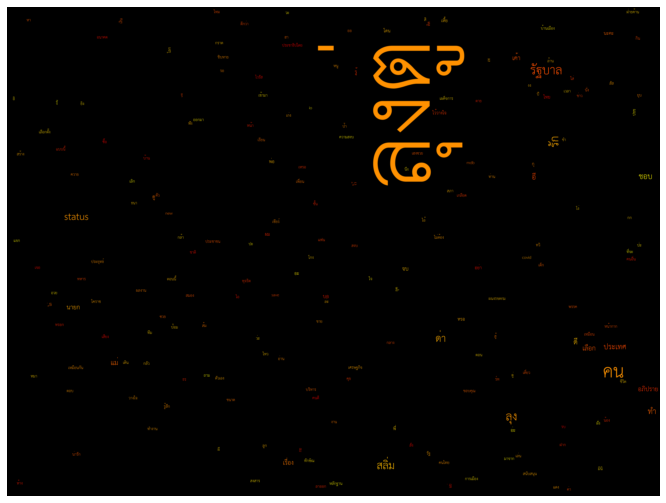

In [27]:
text_tokenize(df['tweet'])
text_to_string(tokens)
generate_wordcloud(text2)
plotting(wordcloud)